# **Model interpertability with SHAP**
**

## **1. Abstract**

The notebook aims for the model interpretability with SHapley Additive exPlanations and 
notebook also aims to classify the humans and horses by using the neural network and the convolution using TensorFlow.

The training set is the data that is used to tell the neural network model that 'this is what a horse looks like', 'this is what a human looks like' etc. 

There is no need to explicitly label the images as horses or humans. It is coded to read images from subdirectories, and automatically label them from the name of that subdirectory. 

## **2. Importing necessary libraries**

In [1]:
import os
import tensorflow as tf
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


## **3. Giving path to the directories**

In [2]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('validation-horse-or-human/validation-horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('validation-horse-or-human/validation-humans')

## **4. Define the network architecture with convolution layers**

In [3]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
   # The fourth convolution
    tf.keras.layers.Conv2D(8, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(2, activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


The model.summary() method call prints a summary of the NN 

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 8)         1

In [5]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='mse',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

##  **5. Data Preprocessing**

Let's set up data generators that will read pictures in our source folders, convert them to `float32` tensors, and feed them (with their labels) to our network. 

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'horse-or-human/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        'validation-horse-or-human/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    directory=r"test-horse-or-human",
    target_size=(150, 150),
    color_mode="rgb",
    batch_size=8,
    class_mode=None,
    shuffle=False
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.
Found 8 images belonging to 1 classes.


In [7]:
def show_batch(image_batch, CLASS_NAMES):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[n].title())
      plt.axis('off')

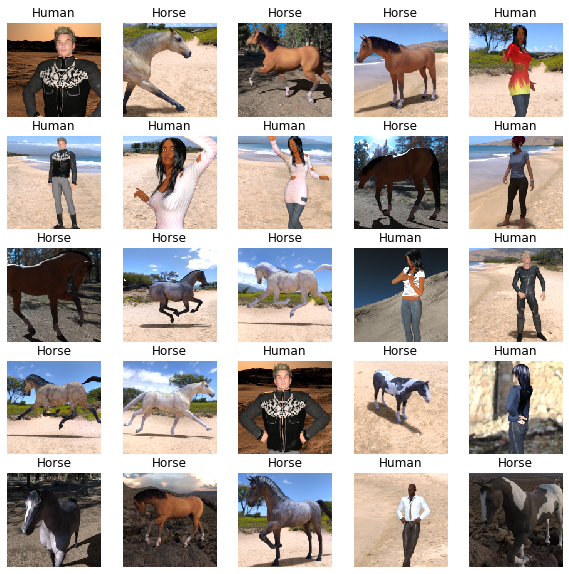

In [8]:
import matplotlib.pyplot as plt

image_batch, label_batch = next(train_generator)
CLASS_NAMES = ["Human" if fn[0]==0 else "Horse" for fn in label_batch]
show_batch(image_batch, CLASS_NAMES)

In [9]:
earlystopper = EarlyStopping(patience=3, verbose=1)
callbacks_list = [earlystopper]



## **6. Training**

In [10]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8,
callbacks=callbacks_list)

Epoch 1/15
8/8 [==============================] - 34s 4s/step - loss: 0.3097 - acc: 0.5228 - val_loss: 0.2342 - val_acc: 0.5625
Epoch 2/15
8/8 [==============================] - 35s 4s/step - loss: 0.2243 - acc: 0.6440 - val_loss: 0.1889 - val_acc: 0.8203
Epoch 3/15
8/8 [==============================] - 41s 5s/step - loss: 0.2129 - acc: 0.7734 - val_loss: 0.1202 - val_acc: 0.8477
Epoch 4/15
8/8 [==============================] - 32s 4s/step - loss: 0.1201 - acc: 0.8269 - val_loss: 0.1507 - val_acc: 0.8047
Epoch 5/15
8/8 [==============================] - 41s 5s/step - loss: 0.0510 - acc: 0.9355 - val_loss: 0.1156 - val_acc: 0.8672
Epoch 6/15
8/8 [==============================] - 32s 4s/step - loss: 0.0464 - acc: 0.9264 - val_loss: 0.1262 - val_acc: 0.8477
Epoch 7/15
8/8 [==============================] - 39s 5s/step - loss: 0.0218 - acc: 0.9727 - val_loss: 0.1222 - val_acc: 0.8672
Epoch 8/15
8/8 [==============================] - 38s 5s/step - loss: 0.0110 - acc: 0.9844 - val_loss: 0

## **7. Predicting the image class**

In [11]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

1/1 [==============================] - 1s 520ms/step


In [12]:
predicted_class_indices=np.argmax(pred,axis=1)

NameError: name 'np' is not defined

In [ ]:
def display_prediction(k):

    f = max(pred[k])*100

    f= str(f)
    if pred[k][0]>0.5:
        print(f + " is a horse")
    else:
        print(f + " is a human")

    image =next(test_generator)
    plt.imshow(image[k])

In [ ]:
display_prediction(2)

The orginal  Image and model say it 98% human

![alt text](https://live.staticflickr.com/5486/14020901609_0915c7c9bf_b.jpg)

In [ ]:
display_prediction(7)

model says it 99% horse

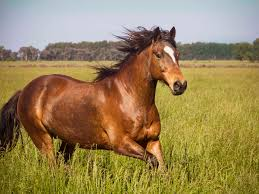

## **8. Shap for model interpretation**

In [ ]:
val, label_batch = next(validation_generator)

In [ ]:
# ...include code from https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

import shap
import numpy as np
# select a set of background examples to take an expectation over
background = image_batch[9:13]

# explain predictions of the model on three images
e = shap.DeepExplainer(model, background)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(val[0:4])

In [ ]:
# plot the feature attributions
shap.image_plot(shap_values, val[0:4])

Red pixels increase the model's output while blue pixels decrease the output.The sum of the SHAP values equals the difference between the expected model output (averaged over the background dataset) and the current model output. 

## **9. Conclusion**

It was able to predict another image that was not seen by the model with very good probability.


### **10. Refrence** 

1. https://www.coursera.org/learn/introduction-tensorflow/home/welcome
2. https://www.tensorflow.org/
3. https://shap.readthedocs.io/en/latest/
4. https://github.com/slundberg/shap

Copyright 2020 Abhishek Gargha Maheshwarappa and Kartik Kumar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.